In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset=pd.read_csv("Social_Network_Ads.csv")
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
dataset=pd.get_dummies(dataset,drop_first=True)
dataset=dataset.astype(int)
dataset

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [4]:
dataset["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [5]:
independent=dataset[['Age', 'EstimatedSalary','Gender_Male']]
dependent=dataset[['Purchased']]

In [6]:
independent, dependent

(     Age  EstimatedSalary  Gender_Male
 0     19            19000            1
 1     35            20000            1
 2     26            43000            0
 3     27            57000            0
 4     19            76000            1
 ..   ...              ...          ...
 395   46            41000            0
 396   51            23000            1
 397   50            20000            0
 398   36            33000            1
 399   49            36000            0
 
 [400 rows x 3 columns],
      Purchased
 0            0
 1            0
 2            0
 3            0
 4            0
 ..         ...
 395          1
 396          1
 397          1
 398          0
 399          1
 
 [400 rows x 1 columns])

In [7]:
#Random Forest Classifier

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size = 1/3, random_state = 0)

In [9]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\sreet\Documents\anaconda installation\envs\aidl\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [10]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, y_pred)

[[78  7]
 [ 6 43]]


In [11]:
print(clf_report)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92        85
           1       0.86      0.88      0.87        49

    accuracy                           0.90       134
   macro avg       0.89      0.90      0.90       134
weighted avg       0.90      0.90      0.90       134



In [12]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92        85
           1       0.86      0.88      0.87        49

    accuracy                           0.90       134
   macro avg       0.89      0.90      0.90       134
weighted avg       0.90      0.90      0.90       134



In [13]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

C:\Users\sreet\Documents\anaconda installation\envs\aidl\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, y_pred)

[[79  6]
 [ 9 40]]


In [15]:
print(clf_report)

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        85
           1       0.87      0.82      0.84        49

    accuracy                           0.89       134
   macro avg       0.88      0.87      0.88       134
weighted avg       0.89      0.89      0.89       134



In [16]:
# Logistic Regression
                 # precision    recall    f1-score   Support

        #  0        0.90         0.93      0.91        85
        #  1        0.87         0.82      0.84        49

    #accuracy                              0.89       134
 #macro avg         0.88        0.87       0.88       134
#weighted avg       0.89        0.89       0.89       134


#Random Forest 

                  #precision    recall  f1-score   support

          #0         0.93      0.92      0.92        85
          #1         0.86      0.88      0.87        49

   #accuracy                             0.90       134
  #macro avg         0.89      0.90      0.90       134
#weighted avg        0.90      0.90      0.90       134

#Decision Tree,

           #         precision    recall   f1-score    Support

          #0           0.93      0.92       0.92        85
          #1           0.86      0.88       0.87        49

    #accuracy                               0.90       134
   #macro avg           0.89      0.90      0.90       134
 #weighted avg          0.90      0.90      0.90       134



# In this Model, More Accuracy is "Random Forest"  
# So Best Model is "Random Forest"

[Text(0.44396551724137934, 0.9615384615384616, 'x[0] <= 42.5\nentropy = 0.937\nsamples = 266\nvalue = [172, 94]'),
 Text(0.2413793103448276, 0.8846153846153846, 'x[1] <= 90500.0\nentropy = 0.642\nsamples = 190\nvalue = [159, 31]'),
 Text(0.3426724137931035, 0.9230769230769231, 'True  '),
 Text(0.13793103448275862, 0.8076923076923077, 'x[0] <= 36.5\nentropy = 0.23\nsamples = 161\nvalue = [155, 6]'),
 Text(0.10344827586206896, 0.7307692307692307, 'entropy = 0.0\nsamples = 105\nvalue = [105, 0]'),
 Text(0.1724137931034483, 0.7307692307692307, 'x[1] <= 83500.0\nentropy = 0.491\nsamples = 56\nvalue = [50, 6]'),
 Text(0.13793103448275862, 0.6538461538461539, 'x[1] <= 67500.0\nentropy = 0.381\nsamples = 54\nvalue = [50, 4]'),
 Text(0.10344827586206896, 0.5769230769230769, 'entropy = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(0.1724137931034483, 0.5769230769230769, 'x[1] <= 70500.0\nentropy = 0.592\nsamples = 28\nvalue = [24, 4]'),
 Text(0.13793103448275862, 0.5, 'entropy = 0.0\nsamples = 1\n

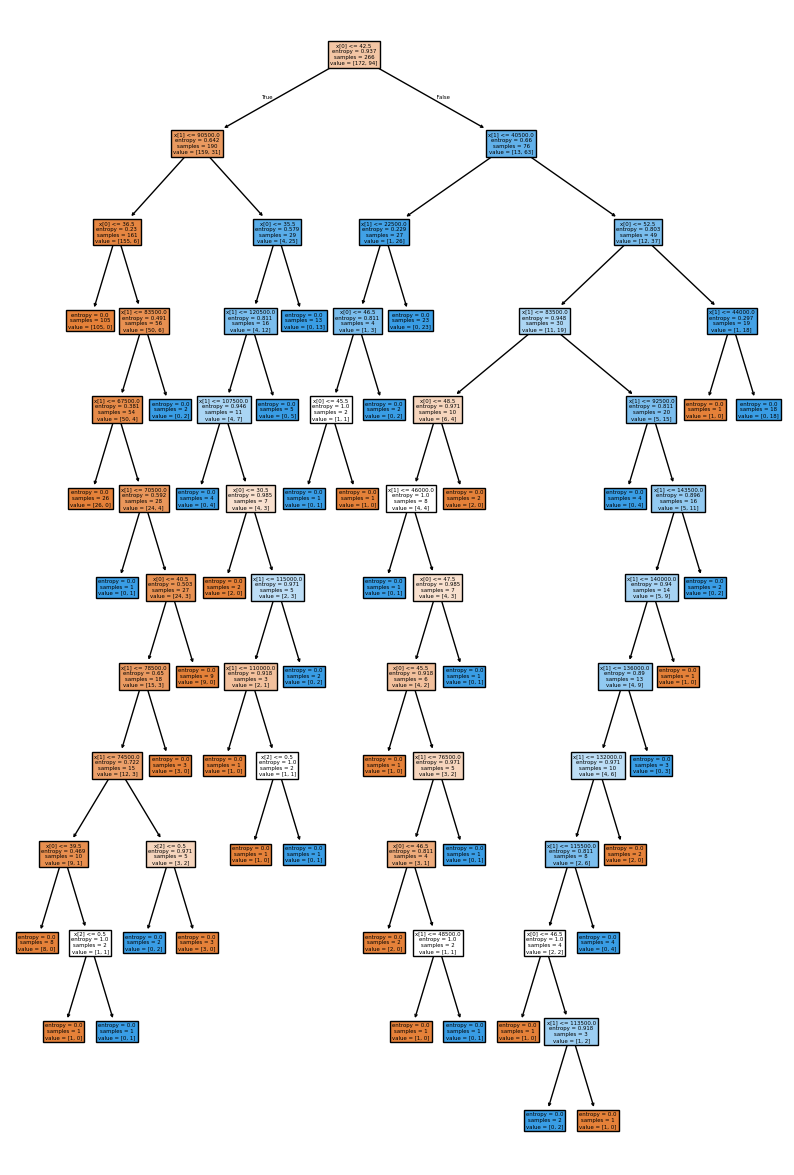

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
classifier = DecisionTreeClassifier(criterion='entropy')
model = classifier.fit(X_train, y_train)
plt.figure(figsize = (10, 15))
tree.plot_tree(model, filled=True)